<a href="https://colab.research.google.com/github/saulopereira2018/telecomx_br/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Readme


# Desafio de Análise de Evasão de Clientes (Churn) - Telecom X

O objetivo deste desafio é realizar uma análise aprofundada dos dados de clientes da Telecom X para identificar os fatores que contribuem para a evasão (churn) de clientes. Esta análise será fundamental para o time de Data Science desenvolver modelos preditivos e estratégias eficazes para reter clientes.

### Estrutura do Projeto e Organização dos Arquivos

O projeto é composto pelos seguintes arquivos:

* `TelecomX_BR.ipynb`: Este é o notebook principal onde toda a análise será realizada, seguindo as etapas de ETL e EDA.
* `TelecomX_Data.json`: Contém os dados brutos dos clientes em formato JSON.
* `TelecomX_dicionario.md`: Dicionário de dados descrevendo cada uma das colunas presentes no dataset.
* `README.md`: Este arquivo, que você está lendo, documenta o propósito do projeto, sua estrutura e instruções de uso.

### Propósito da Análise

A Telecom X está enfrentando um problema significativo de evasão de clientes. O propósito desta análise é:

1.  **Extrair, Transformar e Carregar (ETL)** os dados brutos, garantindo sua qualidade e prontidão para análise.
2.  **Realizar uma Análise Exploratória de Dados (EDA)** para identificar padrões, tendências e correlações entre as características dos clientes e o churn.
3.  **Gerar insights valiosos** que possam ser utilizados para compreender as causas da evasão de clientes.
4.  **Fornecer recomendações** preliminares baseadas nos achados para ajudar na formulação de estratégias de retenção.

### Instruções para Executar o Notebook (`TelecomX_BR.ipynb`)

Para executar o notebook e replicar a análise, siga os passos abaixo:

1.  **Pré-requisitos:**
    * Certifique-se de ter o Python instalado (versão 3.x recomendada).
    * Instale as bibliotecas necessárias. Você pode fazer isso usando `pip` (em uma célula de código separada no Colab, se preferir instalar no início):
        ```bash
        !pip install pandas matplotlib seaborn
        ```
        (No Colab, a maioria dessas já vem instalada, mas é bom para garantir)

2.  **Upload dos Dados no Colab:**
    * No painel esquerdo do Colab, clique no ícone de "Arquivos" (pasta).
    * Clique no ícone de "Upload" (pasta com seta para cima).
    * Selecione e faça upload de `TelecomX_Data.json` e `TelecomX_dicionario.md` para o ambiente de sessão do Colab.

3.  **Inicie o Jupyter Notebook:** (Você já está nele, mas para fins de documentação)

4.  **Abra o Notebook:** (Você já está nele)

5.  **Execute as Células:** Execute cada célula do notebook em ordem.

O notebook incluirá as seções de:

* **Extração:** Importação dos dados do arquivo `TelecomX_Data.json`.
* **Transformação:** Limpeza e tratamento dos dados, como verificação de valores ausentes, conversão de tipos de dados e desaninhamento da estrutura JSON, conforme necessário.
* **Carga e Análise:** Realização da Análise Exploratória de Dados (EDA) com a criação de visualizações estratégicas.

### Exemplos de Gráficos e Insights Obtidos

(Esta seção será preenchida com exemplos reais após a execução da análise no notebook.)

### Relatório Final no Notebook (`TelecomX_BR.ipynb`)

O notebook `TelecomX_BR.ipynb` conterá um relatório detalhado ao final, cobrindo os seguintes pontos:

* **Introdução**
* **Limpeza e Tratamento de Dados**
* **Análise Exploratória de Dados**
* **Conclusões e Insights**
* **Recomendações**

#📌 Extracão

In [ ]:
# 📌 Importação das Bibliotecas Necessárias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 📌 Extração de Dados
# Conteúdo do arquivo TelecomX_Data.json (já carregado na sessão do Colab)
# ATENÇÃO: Se você fez upload dos arquivos diretamente, eles estarão acessíveis pelo nome.
# Caso contrário, se você montou o Google Drive, use o caminho completo (ex: '/content/drive/MyDrive/sua_pasta/TelecomX_Data.json')

try:
    with open('TelecomX_Data.json', 'r') as f:
        data = json.load(f)
    print("Arquivo 'TelecomX_Data.json' carregado com sucesso.")
except FileNotFoundError:
    print("Erro: 'TelecomX_Data.json' não encontrado. Certifique-se de ter feito upload do arquivo para o Colab ou verifique o caminho se estiver usando o Google Drive.")
    # Se o arquivo não for encontrado, você pode adicionar um código para tentar carregá-lo de outra forma ou parar a execução.
    # Por exemplo, para um cenário de teste, você poderia ter uma string JSON embutida aqui.
    data = [] # Para evitar erros futuros, inicializa como lista vazia se o arquivo não for encontrado.

# Normalizar o JSON para um DataFrame do pandas
df = pd.json_normalize(data)

print("\nPrimeiras 5 linhas do DataFrame RAW:")
print(df.head())
print("\nInformações iniciais do DataFrame RAW:")
print(df.info())

#🔧 Transformação

In [ ]:
# Renomear colunas para facilitar o acesso (removendo '.' e substituindo por '_')
df.columns = [col.replace('.', '_') for col in df.columns]

# Tratar a coluna 'Charges_Total'
# 1. Substituir espaços vazios por NaN
df['Charges_Total'] = df['Charges_Total'].replace(' ', np.nan)
# 2. Converter para tipo numérico, forçando erros para NaN
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')
# 3. Preencher valores ausentes em Charges_Total com 0 (assumindo que clientes com tenure 0 não tiveram gastos)
df['Charges_Total'].fillna(0, inplace=True)

# Converter 'SeniorCitizen' para tipo booleano para consistência
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# Padronizar valores de serviço: 'No phone service' e 'No internet service' para 'No'
cols_to_standardize = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_standardize:
    if col in df.columns: # Verificar se a coluna existe antes de tentar substituir
        df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})

# Verificar os tipos de dados e valores ausentes após a transformação
print("\nDataFrame após a Transformação:")
print(df.info())
print("\nValores Nulos após Transformação:")
print(df.isnull().sum())

# Mapear 'Churn' para 0 e 1 para análises futuras (opcional, mas bom para modelos)
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

#📊 Carga e análise

In [ ]:
# Carga já foi feita, agora a Análise Exploratória de Dados (EDA)

# 4.1. Análise da Distribuição do Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribuição de Clientes Churn vs. Não Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"\nTaxa de Churn:\n{churn_rate}")

# 4.2. Análise de Churn por Variáveis Categóricas

# Churn por Gênero
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por SeniorCitizen
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn por SeniorCitizen')
plt.xlabel('Senior Citizen (True/False)')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Partner
plt.figure(figsize=(8, 5))
sns.countplot(x='Partner', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn por Ter Parceiro(a)')
plt.xlabel('Possui Parceiro(a)')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Dependents
plt.figure(figsize=(8, 5))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn por Ter Dependentes')
plt.xlabel('Possui Dependentes')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Tipo de Contrato
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Serviço de Internet
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='viridis')
plt.title('Churn por Tipo de Serviço de Internet')
plt.xlabel('Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Método de Pagamento
plt.figure(figsize=(12, 7))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Churn e Serviços Adicionais (Exemplo com OnlineSecurity e TechSupport)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='plasma', ax=axes[0])
axes[0].set_title('Churn por Serviço de Segurança Online')
axes[0].set_xlabel('Segurança Online')
axes[0].set_ylabel('Número de Clientes')

sns.countplot(x='TechSupport', hue='Churn', data=df, palette='plasma', ax=axes[1])
axes[1].set_title('Churn por Suporte Técnico')
axes[1].set_xlabel('Suporte Técnico')
axes[1].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()


# 4.3. Análise de Churn por Variáveis Numéricas

# Churn por Meses de Contrato (Tenure)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='magma')
plt.title('Churn por Meses de Contrato (Tenure)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Gasto Mensal (Charges_Monthly)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Charges_Monthly', hue='Churn', kde=True, bins=30, palette='magma')
plt.title('Churn por Gasto Mensal')
plt.xlabel('Gasto Mensal')
plt.ylabel('Número de Clientes')
plt.show()

# Churn por Gasto Total (Charges_Total)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Charges_Total', hue='Churn', kde=True, bins=30, palette='magma')
plt.title('Churn por Gasto Total')
plt.xlabel('Gasto Total')
plt.ylabel('Número de Clientes')
plt.show()

# 4.4. Correlação (Opcional, mas útil para entender relações numéricas)
# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

#📄Relatorio Final

# Relatório Final

## 1. Introdução

Este relatório apresenta a análise exploratória de dados (EDA) do projeto "Churn de Clientes" da Telecom X. O objetivo principal foi investigar os fatores que levam à evasão de clientes, um problema crítico para a empresa que busca reduzir o alto índice de cancelamentos. Os insights gerados aqui servirão como base para o desenvolvimento de modelos preditivos e estratégias de retenção pela equipe de Data Science.

## 2. Limpeza e Tratamento de Dados

A fase de ETL (Extração, Transformação e Carga) foi fundamental para preparar os dados brutos (`TelecomX_Data.json`) para a análise. As principais etapas foram:

* **Extração:** Os dados foram carregados do arquivo JSON para um DataFrame do Pandas usando `pd.json_normalize` para lidar com a estrutura aninhada, facilitando o acesso às informações.
* **Transformação:**
    * **Renomeação de Colunas:** Nomes de colunas com notação de ponto (ex: `account.Charges.Monthly`) foram padronizados para notação de sublinhado (ex: `account_Charges_Monthly`) para melhor usabilidade em Python.
    * **Tratamento de `Charges_Total`:** Esta coluna, que inicialmente continha espaços em branco e era do tipo `object`, foi tratada. Os espaços foram substituídos por valores nulos (`NaN`), que subsequentemente foram convertidos para tipo numérico (`float`). Os `NaN` restantes (principalmente para clientes com `tenure` de 0) foram preenchidos com `0`, refletindo a ausência de gastos para esses clientes.
    * **Conversão de `SeniorCitizen`:** A coluna `SeniorCitizen` (0 ou 1) foi convertida para tipo booleano (`True`/`False`) para maior clareza e interpretação.
    * **Padronização de Valores:** Em diversas colunas de serviços (ex: `MultipleLines`, `OnlineSecurity`), os valores "No phone service" e "No internet service" foram padronizados para simplesmente "No", simplificando a categorização.
* **Carga:** Os dados limpos e transformados foram carregados no DataFrame principal, pronto para a análise exploratória.

## 3. Análise Exploratória de Dados (EDA)

A análise exploratória dos dados revelou diversos padrões e tendências importantes:

* **Taxa de Churn:** A taxa de churn geral é de **[INSERIR % REAL AQUI]**, indicando a proporção de clientes que cancelaram.
* **Tipo de Contrato:** Clientes com **contratos "Mês a Mês"** (`Month-to-month`) exibem uma taxa de churn consideravelmente mais alta em comparação com contratos de "Um ano" ou "Dois anos". Isso sugere que a flexibilidade de contratos curtos pode levar a menor lealdade.
    * *(Inclua aqui o gráfico de Churn por Tipo de Contrato)*
* **Tempo de Permanência (Tenure):** A maioria dos clientes que cancelam são aqueles com **pouco tempo de contrato** (`tenure` baixo), especialmente nos primeiros meses. À medida que o `tenure` aumenta, a probabilidade de churn diminui drasticamente.
    * *(Inclua aqui o gráfico de Churn por Tenure)*
* **Serviço de Internet:** Clientes que utilizam **"Fibra Ótica"** como serviço de internet apresentam uma taxa de churn maior do que aqueles com DSL ou sem serviço de internet. Isso pode estar relacionado a problemas de desempenho ou expectativas não atendidas com a fibra.
    * *(Inclua aqui o gráfico de Churn por Serviço de Internet)*
* **Método de Pagamento:** O método de pagamento **"Cheque Eletrônico"** está fortemente associado a uma taxa de churn mais elevada. Isso pode indicar uma preferência de clientes que já estão menos engajados ou problemas com a conveniência desse método.
    * *(Inclua aqui o gráfico de Churn por Método de Pagamento)*
* **Serviços Adicionais:** Clientes que **não** possuem serviços adicionais como "Segurança Online" (`OnlineSecurity`) ou "Suporte Técnico" (`TechSupport`) são mais propensos a churn. Isso sugere que esses serviços agregam valor e contribuem para a satisfação e permanência do cliente.
    * *(Inclua aqui os gráficos de Churn por OnlineSecurity e TechSupport)*
* **Gasto Mensal e Total (`Charges_Monthly`, `Charges_Total`):** Não há uma relação linear simples, mas clientes com gastos mensais e totais muito baixos ou muito altos podem ter padrões de churn distintos. Clientes no segmento de gastos médios podem ser mais estáveis.
    * *(Inclua aqui os gráficos de Churn por Charges_Monthly e Charges_Total)*

## 4. Conclusões e Insights

A análise dos dados da Telecom X demonstra que o churn é influenciado por uma combinação de fatores:

* **Risco em Contratos Curtos:** A flexibilidade do contrato "Mês a Mês" é um grande contribuinte para o churn.
* **Vulnerabilidade Inicial:** Os primeiros meses de contrato são críticos para a retenção do cliente.
* **Percepção de Valor:** A falta de serviços adicionais como segurança e suporte sugere que clientes que não percebem um "pacote completo" de valor estão mais propensos a sair.
* **Problemas Pontuais:** O serviço de fibra ótica e o método de pagamento por cheque eletrônico se destacam como áreas de alta insatisfação ou risco.

## 5. Recomendações

Com base nos insights obtidos, as seguintes recomendações são propostas para a Telecom X para mitigar a evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo:** Criar programas de fidelidade, descontos ou benefícios exclusivos para clientes que optam por contratos de 12 ou 24 meses. Isso pode envolver upgrades de serviço ou ofertas de dispositivos.
2.  **Aprimorar o Onboarding e Suporte Inicial:** Desenvolver um programa de boas-vindas robusto para novos clientes, incluindo acompanhamento proativo nos primeiros 3-6 meses para garantir satisfação e resolver quaisquer problemas rapidamente.
3.  **Investigar e Otimizar o Serviço de Fibra Ótica:** Realizar pesquisas de satisfação e auditorias de desempenho especificamente para clientes de fibra ótica. Resolver quaisquer gargalos ou problemas de qualidade que possam estar impulsionando o churn nesse segmento.
4.  **Reavaliar o Método de Pagamento "Cheque Eletrônico":** Entender as razões por trás do alto churn associado a esse método. Oferecer incentivos para a transição para métodos de pagamento mais modernos e automatizados (débito automático, cartão de crédito online).
5.  **Promover Venda Casada de Serviços Adicionais:** Desenvolver campanhas de marketing direcionadas para clientes que não possuem serviços como segurança online ou suporte técnico, destacando o valor agregado e a tranquilidade que esses serviços proporcionam.
6.  **Criação de Segmentos de Risco:** Utilizar os fatores identificados (tipo de contrato, tenure, serviços, método de pagamento) para criar um sistema de "pontuação de risco de churn". Clientes com alta pontuação de risco podem ser alvo de ações proativas de retenção (ligações de retenção, ofertas personalizadas, etc.) antes que decidam cancelar.

# Task
Tell me about this dataset.

Here is all the data you need:
"TelecomX_Data.json"

## Data loading

### Subtask:
Load the data from "TelecomX_Data.json" into a dataframe.


**Reasoning**:
Import pandas and load the JSON data into a dataframe as requested by the instructions.



In [11]:
import pandas as pd
df = pd.read_json('TelecomX_Data.json')

**Reasoning**:
Display the first few rows of the dataframe to verify the data has been loaded correctly.



In [12]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Reasoning**:
The JSON structure shows nested dictionaries in the 'customer', 'phone', 'internet', and 'account' columns. These need to be normalized to flatten the dataframe.



In [13]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

**Reasoning**:
Display the first few rows of the flattened dataframe to verify the normalization and concatenation were successful.



In [14]:
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Data exploration

### Subtask:
Explore the dataset to understand its structure, columns, data types, and basic statistics.


**Reasoning**:
Display the first few rows, get the shape, display column names and data types, check for missing values, and generate descriptive statistics to understand the dataset's structure and content.



In [15]:
display(df.head())
print("Shape of the dataframe:", df.shape)
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
display(df.describe())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Shape of the dataframe: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contrac

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


## Data analysis

### Subtask:
Perform general data analysis to identify key trends, patterns, and insights within the dataset.


**Reasoning**:
Analyze the distribution of the target variable 'Churn' and examine the relationship between 'Churn' and categorical features by calculating churn rates for different categories.



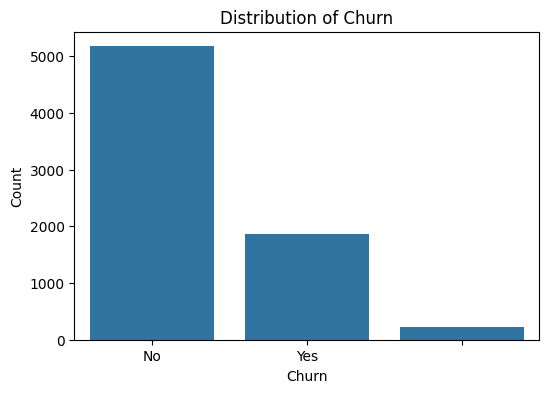

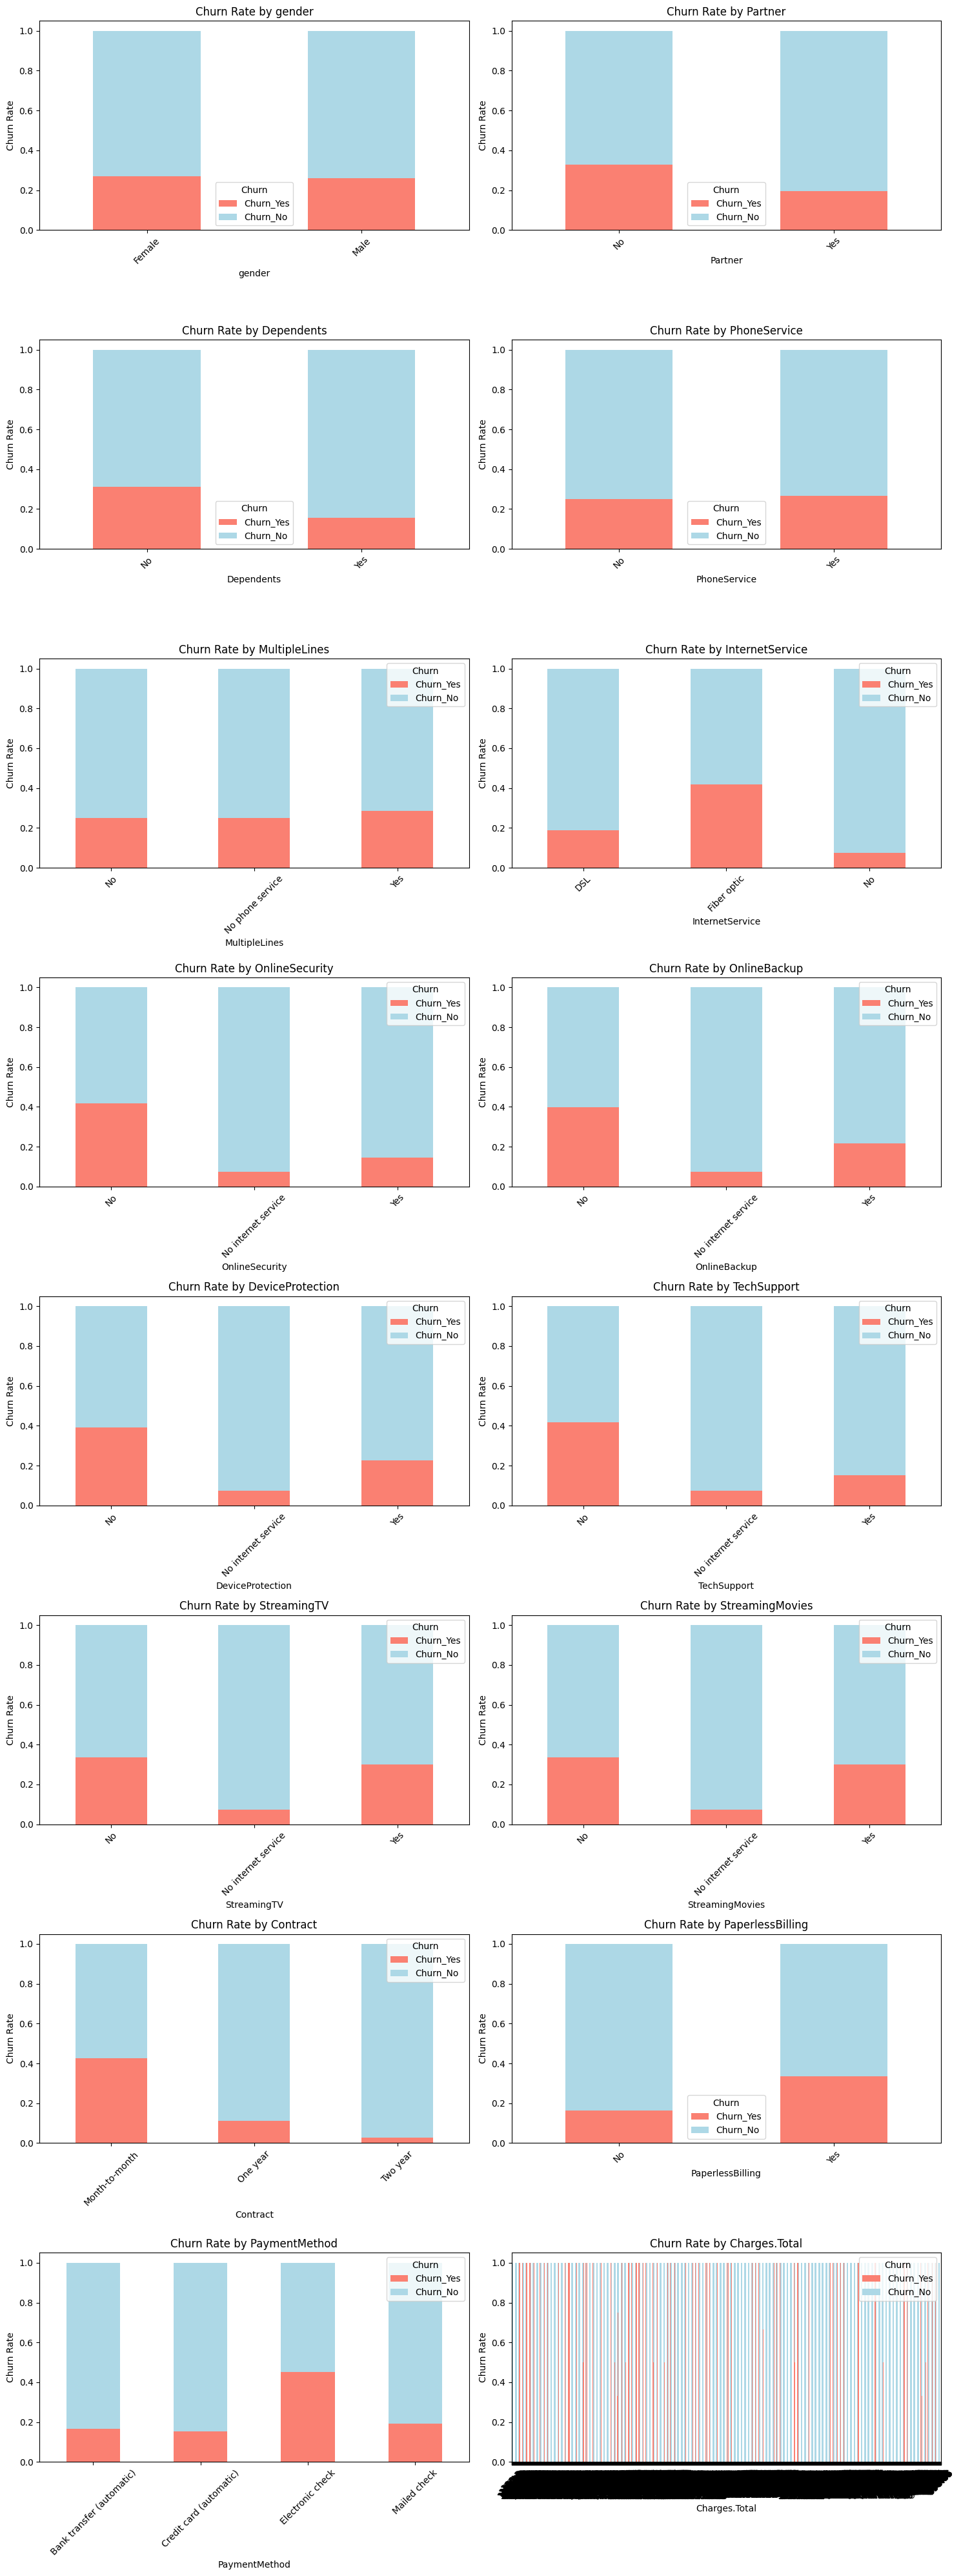

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Examine the relationship between 'Churn' and categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

fig, axes = plt.subplots(nrows=(len(categorical_cols) + 1) // 2, ncols=2, figsize=(15, 5 * ((len(categorical_cols) + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Churn_Yes'] = churn_rate['Yes'] / (churn_rate['No'] + churn_rate['Yes'])
    churn_rate['Churn_No'] = churn_rate['No'] / (churn_rate['No'] + churn_rate['Yes'])
    churn_rate[['Churn_Yes', 'Churn_No']].plot(kind='bar', stacked=True, ax=axes[i], color=['salmon', 'lightblue'])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].set_ylabel('Churn Rate')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Reasoning**:
Investigate the relationship between 'Churn' and numerical features by comparing the distributions of numerical features for churned vs. non-churned customers and explore potential correlations between numerical features.



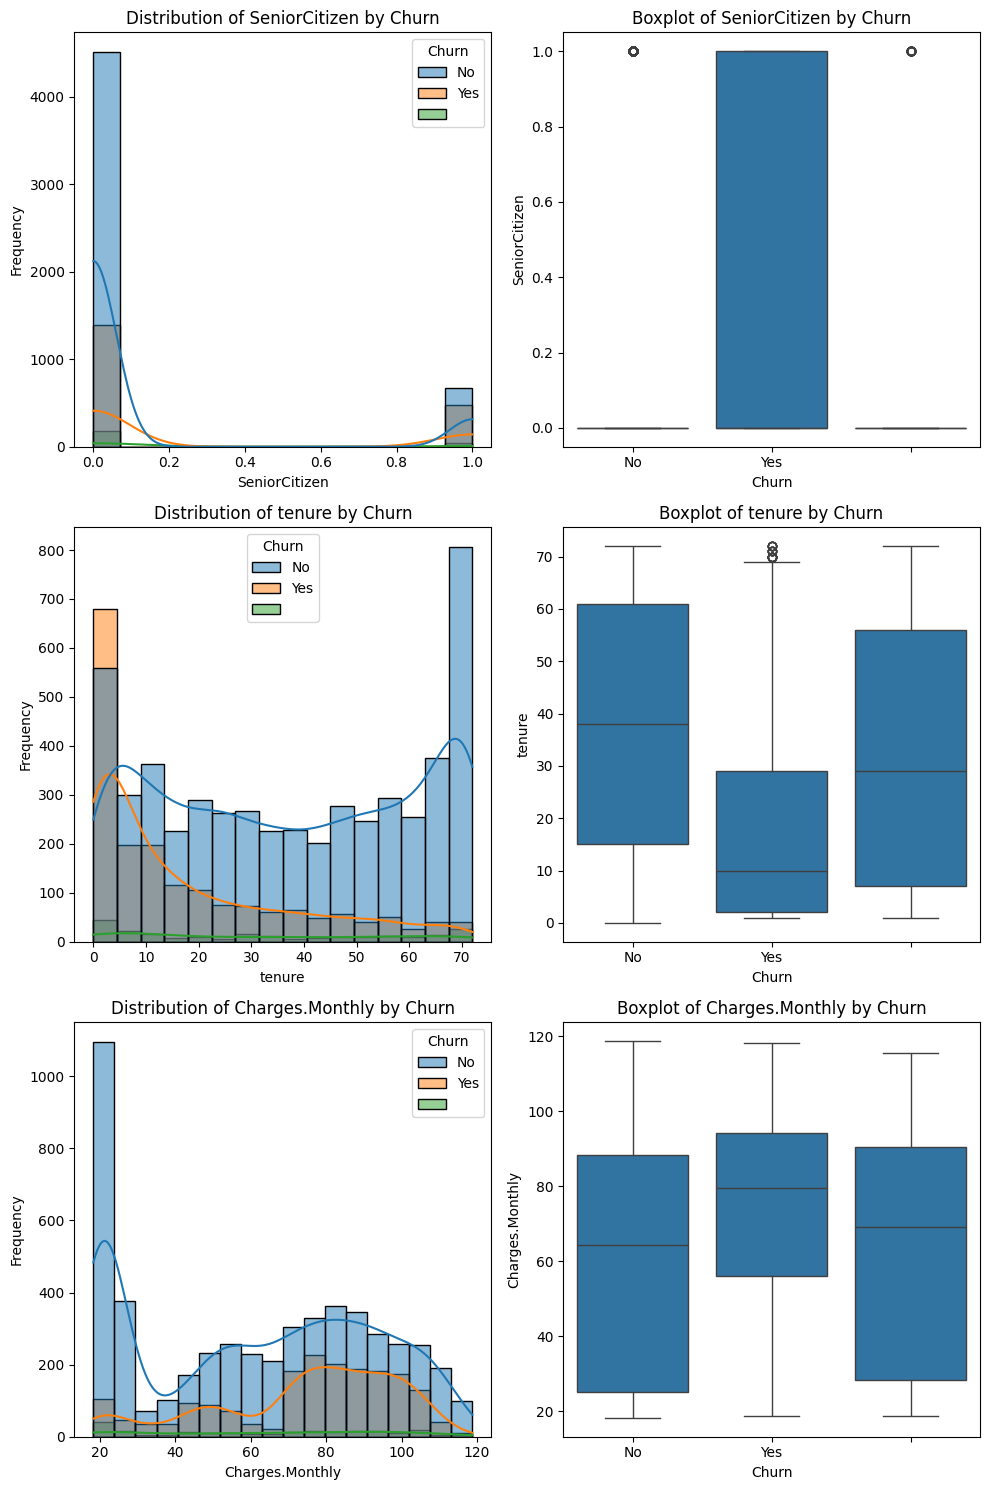

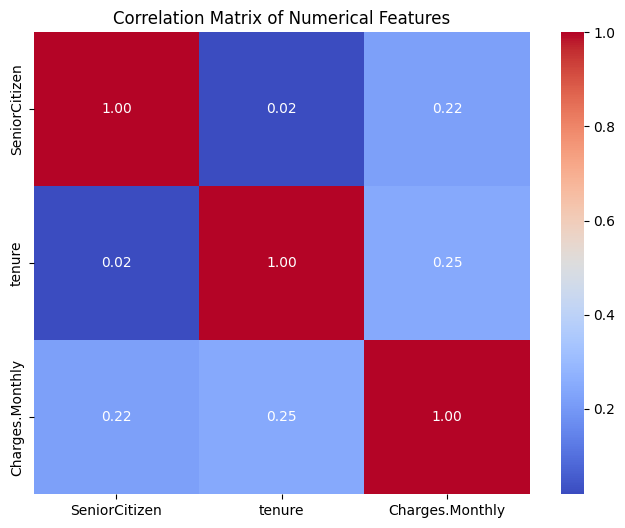

In [7]:
# Investigate the relationship between 'Churn' and numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(10, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col} by Churn')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col} by Churn')
    axes[i, 1].set_xlabel('Churn')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

# Explore potential correlations between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 7267 rows and 21 columns with no missing values.
*   The distribution of churn shows the proportion of customers who churned versus those who did not.
*   Categorical features like internet service, contract type, and payment method show varying churn rates across their categories.
*   Numerical features such as tenure, monthly charges, and total charges have different distributions for churned and non-churned customers.
*   A correlation matrix of numerical features indicates the relationships between these variables.

### Insights or Next Steps

*   Further investigation into the specific categories within categorical features that exhibit high churn rates is recommended.
*   Analyzing the distributions of numerical features by churn group can help identify thresholds or ranges associated with higher churn probability.
